Number of rows= 981
Number of columns 13


C:\Users\geshn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\geshn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


C:\Users\geshn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


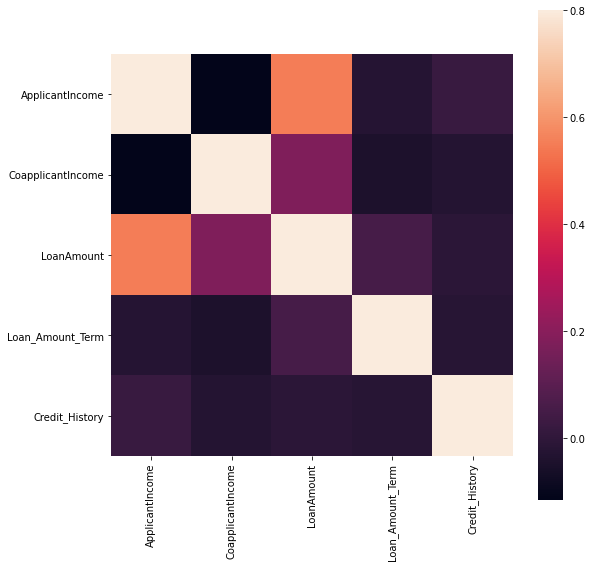

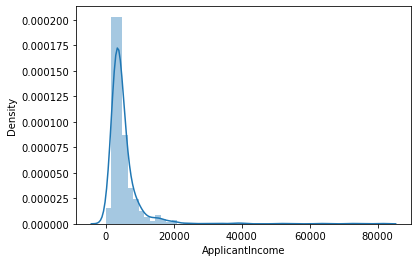

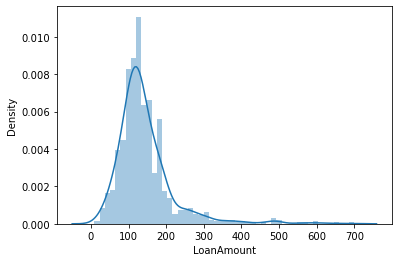

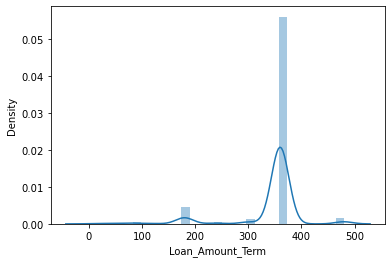

In [27]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# In[2]:


test=pd.read_csv('loan_sanction_test.csv')
train=pd.read_csv('loan_sanction_train.csv')
data=train.append(test)


# In[3]:


data


# In[4]:


print('Number of rows=',data.shape[0])
print('Number of columns',data.shape[1])


# In[5]:


data.describe() 


# In[6]:


data.columns


# In[7]:


corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)


# In[8]:


columns=['ApplicantIncome','LoanAmount',
       'Loan_Amount_Term']
for i in columns:
    plt.figure()
    sns.distplot(data[i]);


# In[9]:


data.info()


# In[10]:


data=data.drop('Loan_ID',axis=1)


# In[11]:


null_val=data.isnull().sum()
null_val


# In[12]:


#Calculating the precentage of the null values
null_val/len(data)*100 


# In[13]:


#Drop the first col of Loan_ID
#data = data.drop('Loan_Status', axis=1)


# In[14]:


#Drop NaN values less than 5%
columns=['Gender','Married','Dependents','LoanAmount','Loan_Amount_Term']


# In[15]:


data=data.dropna(subset=columns)


# In[16]:


data.isnull().sum() * 100 / len(data)


# In[17]:


data['Self_Employed'].mode()


# In[18]:


#Filling the NaN values more than 5% with mode
#We are using 'mode' because both col have categorical data like 1 or 0 only
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


# In[19]:


data['Credit_History'].mode()


# In[20]:


data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])


# In[21]:


data['Loan_Status'].mode()


# In[22]:


data['Loan_Status']=data['Loan_Status'].fillna(data['Loan_Status'].mode()[0])


# In[23]:


data.isnull().sum() * 100 / len(data)


# In[24]:


data['Dependents']=data['Dependents'].replace(to_replace="3+",value='4')
data['Dependents'].unique()


# In[25]:


#Ordinal Encoding: Assign integer values to categories
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area']=data['Property_Area'].map({'Urban':1,'Rural':0,'Semiurban':2}).astype('int')
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype('int')


# In[26]:


data.head()


# In[27]:


x=data.drop('Loan_Status',axis=1)


# In[28]:


y=data['Loan_Status']


# In[29]:


#Features are not in the same range(Feature Scaling)
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']


# In[30]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[cols])
x[cols] = scaler.transform(x[cols])
x


# In[31]:


import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

# Print accuracy scores
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


Decision Tree Accuracy: 0.7303370786516854
SVM Accuracy: 0.8258426966292135
Logistic Regression Accuracy: 0.8202247191011236
Random Forest Accuracy: 0.8314606741573034
KNN Accuracy: 0.8146067415730337


In [29]:
from sklearn.ensemble import VotingClassifier

# Initialize the individual models (assuming you have already trained these models)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Train the individual models using the training data
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
svm.fit(x_train, y_train)
rf.fit(x_train, y_train)
knn.fit(x_train, y_train)

# Calculate the accuracy of each individual model on the validation set or through cross-validation
lr_acc = accuracy_score(y_test, lr.predict(x_test))
dt_acc = accuracy_score(y_test, dt.predict(x_test))
svm_acc = accuracy_score(y_test, svm.predict(x_test))
rf_acc = accuracy_score(y_test, rf.predict(x_test))
knn_acc = accuracy_score(y_test, knn.predict(x_test))

# Assign weights based on the accuracy scores
# Models with higher accuracy will have higher weights
accuracy_scores = [lr_acc, dt_acc, svm_acc, rf_acc, knn_acc]
weights = [score / sum(accuracy_scores) for score in accuracy_scores]

# Define the ensemble model using VotingClassifier with weighted voting
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('svm', svm), ('rf', rf), ('knn', knn)],
    voting='soft',  # 'soft' for weighted voting, 'hard' for majority voting
    weights=weights
)

# Train the ensemble model using the training data
ensemble.fit(x_train, y_train)

# Make predictions on the testing data
ensemble_pred = ensemble.predict(x_test)

# Print the accuracy of the ensemble model
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))


Ensemble Accuracy: 0.8370786516853933


In [33]:
# Make predictions on the testing data using the ensemble model
ensemble_pred = ensemble.predict(y)
print(ensemble_pred)

C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
t = ensemble.predict([[1,1,1,1,0,4583,0,128.0,360.0,1.0,0]])
print(t)

[0]


C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [40]:
import pickle
# now you can save it to a file
file = 'C:/Users/geshn/ML Loan Project/Model/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(ensemble, f)

In [41]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [42]:
cy = k.predict([[0.0,0.0,0.0,1,	0.0,4230,0.0,112.0,360.0,1.0,1]])
print(cy)

[1]


C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\geshn\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
